In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("customer_details.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
df = df.drop(columns=['Gender', 'Category', 'Season', 'Subscription Status', 'Shipping Type', 'Frequency of Purchases'])
df

,Customer ID,Age,Item Purchased,Purchase Amount (USD),Location,Size,Color,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Payment Method
0,1,55,Blouse,53,Kentucky,L,Gray,3.1,Yes,Yes,14,Venmo
1,2,19,Sweater,64,Maine,L,Maroon,3.1,Yes,Yes,2,Cash
2,3,50,Jeans,73,Massachusetts,S,Maroon,3.1,Yes,Yes,23,Credit Card
3,4,21,Sandals,90,Rhode Island,M,Maroon,3.5,Yes,Yes,49,PayPal
4,5,45,Blouse,49,Oregon,M,Turquoise,2.7,Yes,Yes,31,PayPal
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Hoodie,28,Virginia,L,Turquoise,4.2,No,No,32,Venmo
3896,3897,52,Backpack,49,Iowa,L,White,4.5,No,No,41,Bank Transfer
3897,3898,46,Belt,33,New Jersey,L,Green,2.9,No,No,24,Venmo
3898,3899,44,Shoes,77,Minnesota,S,Brown,3.8,No,No,24,Venmo


In [4]:
le_Item_Purchased = LabelEncoder()
le_Location = LabelEncoder()
le_Size = LabelEncoder()
le_Color = LabelEncoder()
le_Discount_Applied = LabelEncoder()
le_Promo_Code = LabelEncoder()
le_Payment_Method = LabelEncoder()

In [5]:
df['Item_Purchased_n'] = le_Item_Purchased.fit_transform(df['Item Purchased'])
df['Location_n'] = le_Location.fit_transform(df['Location'])
df['Size_n'] = le_Size.fit_transform(df['Size'])
df['Color_n'] = le_Color.fit_transform(df['Color'])
df['Discount_Applied_n'] = le_Discount_Applied.fit_transform(df['Discount Applied'])
df['Promo_Code_n'] = le_Promo_Code.fit_transform(df['Promo Code Used'])
df['Payment_Method_n'] = le_Payment_Method.fit_transform(df['Payment Method'])
df

,Customer ID,Age,Item Purchased,Purchase Amount (USD),Location,Size,Color,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Item_Purchased_n,Location_n,Size_n,Color_n,Discount_Applied_n,Promo_Code_n,Payment_Method_n
0,1,55,Blouse,53,Kentucky,L,Gray,3.1,Yes,Yes,14,Venmo,2,16,0,7,1,1,5
1,2,19,Sweater,64,Maine,L,Maroon,3.1,Yes,Yes,2,Cash,23,18,0,12,1,1,1
2,3,50,Jeans,73,Massachusetts,S,Maroon,3.1,Yes,Yes,23,Credit Card,11,20,2,12,1,1,2
3,4,21,Sandals,90,Rhode Island,M,Maroon,3.5,Yes,Yes,49,PayPal,14,38,1,12,1,1,4
4,5,45,Blouse,49,Oregon,M,Turquoise,2.7,Yes,Yes,31,PayPal,2,36,1,21,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Hoodie,28,Virginia,L,Turquoise,4.2,No,No,32,Venmo,9,45,0,21,0,0,5
3896,3897,52,Backpack,49,Iowa,L,White,4.5,No,No,41,Bank Transfer,0,14,0,23,0,0,0
3897,3898,46,Belt,33,New Jersey,L,Green,2.9,No,No,24,Venmo,1,29,0,8,0,0,5
3898,3899,44,Shoes,77,Minnesota,S,Brown,3.8,No,No,24,Venmo,17,22,2,3,0,0,5


In [6]:
df = df.drop(columns=['Item Purchased', 'Location', 'Size', 'Color', 'Discount Applied', 'Promo Code Used', 'Payment Method'])
df

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Item_Purchased_n,Location_n,Size_n,Color_n,Discount_Applied_n,Promo_Code_n,Payment_Method_n
0,1,55,53,3.1,14,2,16,0,7,1,1,5
1,2,19,64,3.1,2,23,18,0,12,1,1,1
2,3,50,73,3.1,23,11,20,2,12,1,1,2
3,4,21,90,3.5,49,14,38,1,12,1,1,4
4,5,45,49,2.7,31,2,36,1,21,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,9,45,0,21,0,0,5
3896,3897,52,49,4.5,41,0,14,0,23,0,0,0
3897,3898,46,33,2.9,24,1,29,0,8,0,0,5
3898,3899,44,77,3.8,24,17,22,2,3,0,0,5


In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Item_Purchased_n,Location_n,Size_n,Color_n,Discount_Applied_n,Promo_Code_n,Payment_Method_n
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,12.035385,24.266410,1.120000,12.109487,0.430000,0.430000,2.512308
std,1125.977353,15.207589,23.685392,0.716223,14.447125,7.199162,14.343299,0.930496,7.221592,0.495139,0.495139,1.690643
min,1.000000,18.000000,20.000000,2.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000,6.000000,12.000000,0.000000,6.000000,0.000000,0.000000,1.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,12.000000,24.000000,1.000000,12.000000,0.000000,0.000000,2.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,18.000000,36.000000,2.000000,18.000000,1.000000,1.000000,4.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000,24.000000,49.000000,3.000000,24.000000,1.000000,1.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            3900 non-null   int64  
 1   Age                    3900 non-null   int64  
 2   Purchase Amount (USD)  3900 non-null   int64  
 3   Review Rating          3900 non-null   float64
 4   Previous Purchases     3900 non-null   int64  
 5   Item_Purchased_n       3900 non-null   int32  
 6   Location_n             3900 non-null   int32  
 7   Size_n                 3900 non-null   int32  
 8   Color_n                3900 non-null   int32  
 9   Discount_Applied_n     3900 non-null   int32  
 10  Promo_Code_n           3900 non-null   int32  
 11  Payment_Method_n       3900 non-null   int32  
dtypes: float64(1), int32(7), int64(4)
memory usage: 259.1 KB


In [9]:
print(df.isnull().sum())

Customer ID              0
Age                      0
Purchase Amount (USD)    0
Review Rating            0
Previous Purchases       0
Item_Purchased_n         0
Location_n               0
Size_n                   0
Color_n                  0
Discount_Applied_n       0
Promo_Code_n             0
Payment_Method_n         0
dtype: int64


In [23]:
feature_cols = ['Customer ID', 'Age', 'Review Rating', 'Previous Purchases', 'Item_Purchased_n', 'Location_n', 'Size_n', 'Color_n', 'Discount_Applied_n', 'Promo_Code_n', 'Payment_Method_n']
target_col = 'Purchase Amount (USD)'  # Replace 'Target' with the actual name of the column you want to predict

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluate Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print("Linear Regression MSE:", mse_lin)
print("Linear Regression R2:", r2_lin)

Linear Regression MSE: 566.4312392575362
Linear Regression R2: -0.012239248067619668


In [20]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R2:", r2_lasso)

Lasso Regression MSE: 566.1268648555197
Lasso Regression R2: -0.01169531670494961


In [13]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R2:", r2_ridge)

Ridge Regression MSE: 566.4304515925757
Ridge Regression R2: -0.012237840473313


In [14]:
# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# Evaluate Decision Tree Regression
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree Regression MSE:", mse_tree)
print("Decision Tree Regression R2:", r2_tree)

Decision Tree Regression MSE: 1107.7602564102565
Decision Tree Regression R2: -0.9796196453742689


In [15]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} MSE: {mse:.4f}")
    print(f"{model_name} R2: {r2:.4f}")
    return mse, r2

# Linear Regression
mse_lin, r2_lin = evaluate_model(lin_reg, X_test, y_test, "Linear Regression")

# Lasso Regression
mse_lasso, r2_lasso = evaluate_model(lasso_reg, X_test, y_test, "Lasso Regression")

# Ridge Regression
mse_ridge, r2_ridge = evaluate_model(ridge_reg, X_test, y_test, "Ridge Regression")

# Decision Tree Regression
mse_tree, r2_tree = evaluate_model(tree_reg, X_test, y_test, "Decision Tree Regression")

Linear Regression MSE: 566.4312
Linear Regression R2: -0.0122
Lasso Regression MSE: 566.1269
Lasso Regression R2: -0.0117
Ridge Regression MSE: 566.4305
Ridge Regression R2: -0.0122
Decision Tree Regression MSE: 1107.7603
Decision Tree Regression R2: -0.9796


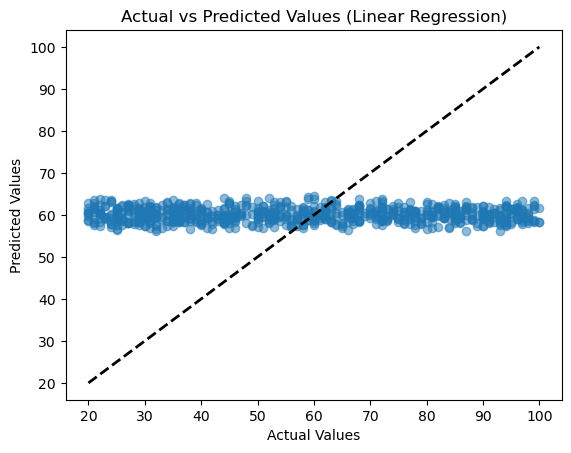

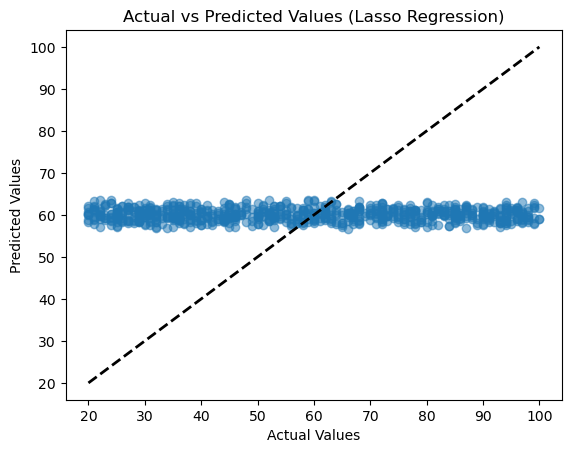

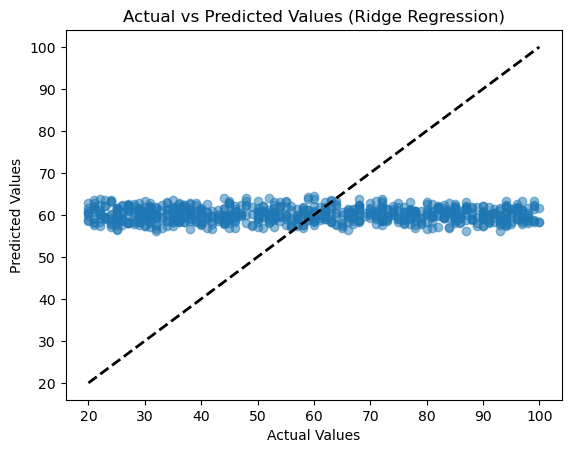

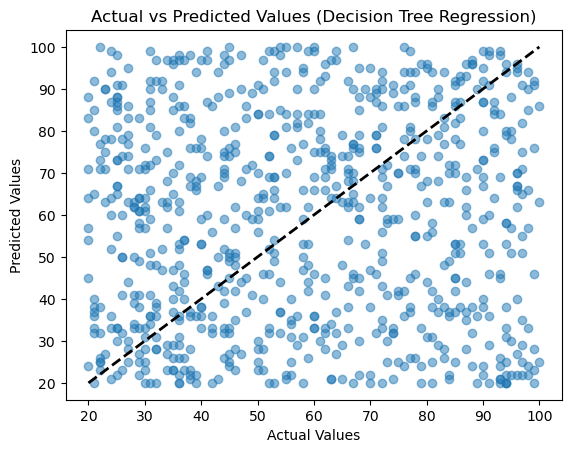

In [16]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred, model_name):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted Values ({model_name})")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()

# Plot predictions for each model
plot_predictions(y_test, lin_reg.predict(X_test), "Linear Regression")
plot_predictions(y_test, lasso_reg.predict(X_test), "Lasso Regression")
plot_predictions(y_test, ridge_reg.predict(X_test), "Ridge Regression")
plot_predictions(y_test, tree_reg.predict(X_test), "Decision Tree Regression")

In [17]:
# Function to print coefficients
def print_coefficients(model, model_name):
    print(f"{model_name} Coefficients:")
    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")
    print()

# Print coefficients for Linear Regression
print_coefficients(lin_reg, "Linear Regression")

# Print coefficients for Lasso Regression
print_coefficients(lasso_reg, "Lasso Regression")

# Print coefficients for Ridge Regression
print_coefficients(ridge_reg, "Ridge Regression")

Linear Regression Coefficients:
Customer ID: -0.0006
Age: -0.0186
Review Rating: 0.8674
Previous Purchases: 0.0021
Item_Purchased_n: 0.0396
Location_n: 0.0582
Size_n: 0.8483
Color_n: -0.0190
Discount_Applied_n: -0.7829
Promo_Code_n: -0.7829
Payment_Method_n: -0.3390

Lasso Regression Coefficients:
Customer ID: -0.0000
Age: -0.0185
Review Rating: 0.6796
Previous Purchases: 0.0024
Item_Purchased_n: 0.0388
Location_n: 0.0574
Size_n: 0.7441
Color_n: -0.0175
Discount_Applied_n: -0.0337
Promo_Code_n: -0.0000
Payment_Method_n: -0.3043

Ridge Regression Coefficients:
Customer ID: -0.0006
Age: -0.0186
Review Rating: 0.8669
Previous Purchases: 0.0021
Item_Purchased_n: 0.0396
Location_n: 0.0582
Size_n: 0.8481
Color_n: -0.0190
Discount_Applied_n: -0.7810
Promo_Code_n: -0.7810
Payment_Method_n: -0.3390



In [18]:
# Summary of the models' performance
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regression']
mse_values = [mse_lin, mse_lasso, mse_ridge, mse_tree]
r2_values = [r2_lin, r2_lasso, r2_ridge, r2_tree]

summary_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R2': r2_values
})

print(summary_df)

                      Model          MSE        R2
0         Linear Regression   566.431239 -0.012239
1          Lasso Regression   566.126865 -0.011695
2          Ridge Regression   566.430452 -0.012238
3  Decision Tree Regression  1107.760256 -0.979620
